# DIGITAL ASSIGNMENT 3                                                                                           
__Samriddhi Verma__                                                                                                             
__16BCE1375__                                                                                                                   
__Slot: G1__

__Loading Dataset__

In [1]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

data= pd.read_csv("seeds_dataset.csv")

In [2]:
data.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
data.shape

(210, 9)

__The dataset contains 9 features and 210 transactions.__

In [4]:
data.describe()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,105.500000,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,0.461905
std,60.765944,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.499738
min,1.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,53.250000,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,105.500000,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,0.000000
75%,157.750000,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,1.000000
max,210.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,1.000000


__Defining X and y__

In [5]:
X= data.drop('seedType',axis=1)
y=data['seedType']

__Splitting X and y into training and testing sets__


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
X_train.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
61,62,11.23,12.63,0.8840,4.902,2.879,2.2690,4.703
24,25,15.01,14.76,0.8657,5.789,3.245,1.7910,5.001
30,31,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056
60,61,11.42,12.86,0.8683,5.008,2.850,2.7000,4.607
56,57,14.46,14.35,0.8818,5.388,3.377,2.8020,5.044


__Standardizing the data for performing classification.__

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

__Performing MLP:__

In [11]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3,3,3),max_iter=500,activation='identity')

In [12]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [13]:
predictions = mlp.predict(X_test)

__Classification Accuracy__

In [14]:
print(accuracy_score(y_test,predictions))

0.873015873015873


__We observe that the accuracy score of this model is 88%.__

In [15]:
# examine the class distribution of the testing set
y_test.value_counts()

0    33
1    30
Name: seedType, dtype: int64

__Calculate the percentage of ones because y_test only contains ones and zeros, we can simply                              calculate the mean = percentage of ones.__

In [16]:
y_test.mean()

0.47619047619047616

In [17]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)


0    0.52381
Name: seedType, dtype: float64

In [18]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', predictions[0:25])

True [0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0]
Pred [0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0]


__Confusion Matrix__

In [19]:
confusion= confusion_matrix(y_test,predictions)
print(confusion)

[[26  7]
 [ 1 29]]


In [20]:
print(classification_report(y_test,predictions))


             precision    recall  f1-score   support

          0       0.96      0.79      0.87        33
          1       0.81      0.97      0.88        30

avg / total       0.89      0.87      0.87        63



In [21]:
#Slicing the confusion matrix into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[26  7]
 [ 1 29]]


__Metrics computed from a confusion matrix__

In [22]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, predictions))

0.873015873015873
0.873015873015873


__The result of the classification accuracy.__

In [23]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, predictions))

0.12698412698412698
0.12698412698412698


__The result is the classification error, which means misclassification error.__

__Sensitivity is when the actual value is positive of how correct is the prediciton.__

In [24]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, predictions))

0.9666666666666667
0.9666666666666667


__Specificity: When the actual value is negative of how correct is the prediction correct.__

In [25]:
specificity = TN / (TN + FP)

print(specificity)

0.7878787878787878


We infer that our classifier is specific as well as highly sensitive

__False Positive Rate: When the actual value is negative, how often is the prediction incorrect.__

In [26]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.21212121212121213
0.21212121212121215


__Precision: When a positive value is predicted, how often is the prediction correct.__

In [27]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, predictions))

0.8055555555555556
0.8055555555555556


__Adjusting the classification threshold__

In [28]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
mlp.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
# print the first 10 predicted probabilities of class membership
mlp.predict_proba(X_test)[0:10]

array([[0.99757849, 0.00242151],
       [0.82435646, 0.17564354],
       [0.98864422, 0.01135578],
       [0.99619374, 0.00380626],
       [0.23166083, 0.76833917],
       [0.49212857, 0.50787143],
       [0.457447  , 0.542553  ],
       [0.25955862, 0.74044138],
       [0.4365503 , 0.5634497 ],
       [0.26591889, 0.73408111]])

In [30]:
# print the first 10 predicted probabilities for class 1
mlp.predict_proba(X_test)[0:10, 1]

array([0.00242151, 0.17564354, 0.01135578, 0.00380626, 0.76833917,
       0.50787143, 0.542553  , 0.74044138, 0.5634497 , 0.73408111])

In [31]:
# store the predicted probabilities for class 1
prediction_prob = mlp.predict_proba(X_test)[:, 1]

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12

Text(0,0.5,'Frequency')

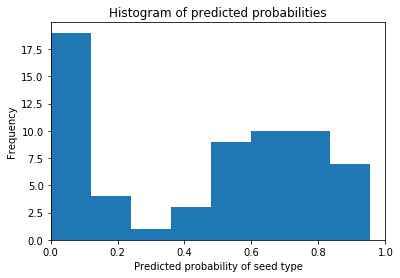

In [33]:
# histogram of predicted probabilities

# 8 bins
plt.hist(prediction_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of seed type')
plt.ylabel('Frequency')


From the first bar, we see that about 18% observations have probability of 0 to 0.1. Quite a good number of predictions have a probabilty >0.5
So, most seed would be predicted to belong to class 1. Threshold can be adjusted to convert predicted probabilites into class predictions.

__Receiver Operating Characteristic (ROC) Curves__

We could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold

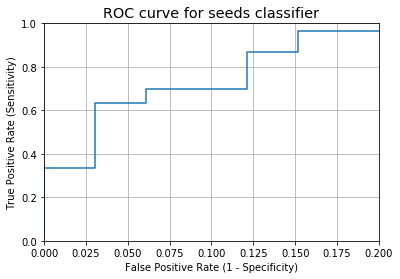

In [34]:
# we pass y_test and prediction_prob
# we do not use predictions, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 0.2])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for seeds classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

__ROC curve can help to choose a threshold that balances sensitivity and specificity in a way that makes sense for  particular context.__

In [35]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [36]:
evaluate_threshold(0.5)


Sensitivity: 0.9666666666666667
Specificity: 0.8484848484848485


In [37]:
evaluate_threshold(0.3)


Sensitivity: 1.0
Specificity: 0.7575757575757576


__AUC__

In [38]:
print(metrics.roc_auc_score(y_test, prediction_prob))


0.9434343434343434


__AUC is useful as a single number summary of classifier performance.                                          
Higher value = better classifier__

In [39]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(mlp, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\Samriddhi Verma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Samriddhi Verma\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6171212121212121

__Hence, we were able to understand the working and effect of various metrics for evaluation of the model.__